In [2]:
# imports
import requests
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:
# load bike stations data from available_bikes.csv
bike_stations = pd.read_csv('..\\data\\available_bikes.csv')

# load Foursquare POI data from FS_nearby_POIs.csv
FS_nearby_POIs = pd.read_csv('..\\data\\FS_nearby_POIs.csv')

# load Yelp POI data from Yelp_nearby_POIs.csv
Yelp_nearby_POIs = pd.read_csv('..\\data\\Yelp_nearby_POIs.csv')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [4]:
bike_stations

,station_id,name,lon,lat,address,num_bikes_available,num_bikes_disabled,last_reported
0,hub_540,Sanders at Hollywood,-79.926481,43.259903,"26, Sanders Boulevard, University Gardens, Ham...",27,0,2024-03-09 15:06:26
1,hub_545,Emerson at Whitney,-79.922216,43.252142,"202, Emerson Street, University Gardens, Hamil...",16,0,2024-03-09 15:06:26
2,hub_557,Dundurn at Aberdeen,-79.892656,43.251458,"330-346 Dundurn Street South, Hamilton",13,0,2024-03-09 15:06:26
3,hub_571,Oxford at York,-79.877794,43.264564,"40-48 Oxford Street, Hamilton",13,0,2024-03-09 15:06:26
4,hub_554,Macklin at King,-79.896498,43.262167,"768, King Street West, McMaster Innovation Par...",12,0,2024-03-09 15:06:26
...,...,...,...,...,...,...,...,...
133,hub_605,Wentworth at King,-79.849104,43.251990,"16 Wentworth Street South, Hamilton",1,0,2024-03-09 15:06:26
134,hub_5838,King at Sanford,-79.846358,43.251884,"735, King Street East, Hamilton, Ontario",1,0,2024-03-09 15:06:26
135,hub_894,Forsyth at Sterling,-79.915806,43.262714,"88 Forsyth Avenue North, Hamilton",1,0,2024-03-09 15:06:26
136,hub_5846,Cannon at Steven,-79.849981,43.256461,"400-408 Cannon Street East, Hamilton",1,0,2024-03-09 15:06:26


In [5]:
FS_nearby_POIs.head()

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,...,location.address_extended,related_places.children,geocodes.drop_off.latitude,geocodes.drop_off.longitude,geocodes.front_door.latitude,geocodes.front_door.longitude,station_id,related_places.parent.fsq_id,related_places.parent.categories,related_places.parent.name
0,4c405e7a520fa593a3e6c7ac,Diner,[],LikelyOpen,348,/v3/places/4c405e7a520fa593a3e6c7ac,Maple Leaf Pancake House,America/Toronto,43.257771,-79.923534,...,NaN,NaN,NaN,NaN,NaN,NaN,hub_540,NaN,NaN,NaN
1,4b6b5d23f964a520a7032ce3,Pub,[],LikelyOpen,547,/v3/places/4b6b5d23f964a520a7032ce3,Phoenix Bar & Grill,America/Toronto,43.262878,-79.921158,...,NaN,NaN,NaN,NaN,NaN,NaN,hub_540,NaN,NaN,NaN
2,4ba9734cf964a520f3273ae3,Chinese Restaurant,[],VeryLikelyOpen,315,/v3/places/4ba9734cf964a520f3273ae3,Tally Ho Restaurants,America/Toronto,43.257728,-79.924083,...,NaN,NaN,NaN,NaN,NaN,NaN,hub_540,NaN,NaN,NaN
3,4bb832a87421a5937ca4c140,Pizzeria,[{'id': 'd5737460-d890-0132-61d3-7a163eb2a6fc'...,VeryLikelyOpen,308,/v3/places/4bb832a87421a5937ca4c140,Boston Pizza,America/Toronto,43.257231,-79.927615,...,Cottrill St,NaN,NaN,NaN,NaN,NaN,hub_540,NaN,NaN,NaN
4,59035559061b51746eba7df9,Brewery,[],VeryLikelyOpen,546,/v3/places/59035559061b51746eba7df9,Grain & Grit Beer Co,America/Toronto,43.256697,-79.931604,...,NaN,NaN,NaN,NaN,NaN,NaN,hub_540,NaN,NaN,NaN


In [6]:
# loop through FS_nearby_POIs and calculate the sum of distance to bike stations where the station_id is the same
# and save the results grouped by station_id to a new dataframe
FS_distance = FS_nearby_POIs.groupby('station_id')['distance'].sum().reset_index()
FS_distance.columns = ['station_id', 'FS_sum_distance']

#sort the df by FS_sum_distance ascending
FS_distance = FS_distance.sort_values(by='FS_sum_distance', ascending=True)

#count the number of instances of each station_id in FS_nearby_POIs
#add the count to the FS_distance df as a new column FS_POI_count
#make sure to align the counts with the correct station_id
FS_distance['FS_POI_count'] = FS_nearby_POIs['station_id'].value_counts().sort_index().values

#using the FS_sum_distance and FS_POI_count columns, calculate the average distance to POIs for each station
FS_distance['FS_avg_distance'] = FS_distance['FS_sum_distance'] / FS_distance['FS_POI_count']

# sort the df by avg_distance ascending
FS_distance = FS_distance.sort_values(by='FS_avg_distance', ascending=True)


FS_distance # the stations listed in this order tend to have the closest POIs


,station_id,FS_sum_distance,FS_POI_count,FS_avg_distance
7,hub_2868,1379,10,137.900
125,hub_802,1689,10,168.900
25,hub_535,1759,10,175.900
117,hub_707,1874,10,187.400
128,hub_867,2156,10,215.600
...,...,...,...,...
41,hub_549,6957,10,695.700
77,hub_5837,7065,10,706.500
104,hub_610,7324,10,732.400
105,hub_611,7043,8,880.375


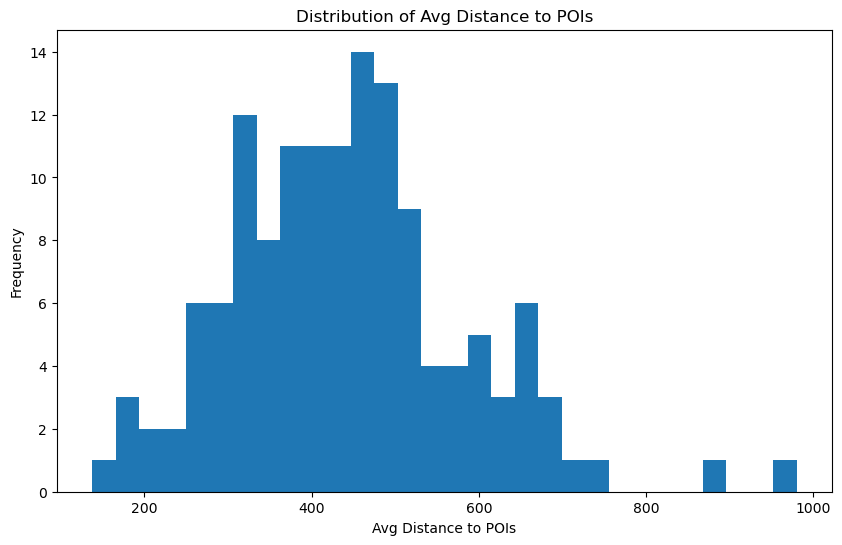

In [7]:
# plot the distribution of avg_distance for all stations
plt.figure(figsize=(10, 6))
plt.hist(FS_distance['FS_avg_distance'], bins=30)
plt.xlabel('Avg Distance to POIs')
plt.ylabel('Frequency')
plt.title('Distribution of Avg Distance to POIs')
plt.show()


# Does the figure above help give us an idea of where each station is located i.e. in a denser part of hamilton or not?
## does yelp show something similar?


In [8]:
Yelp_nearby_POIs.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address,station_id
0,KrvHV0kJlf8XzVChZHSzJA,mr-gao-hamilton,Mr Gao,https://s3-media3.fl.yelpcdn.com/bphoto/COI8HS...,False,https://www.yelp.com/biz/mr-gao-hamilton?adjus...,35,"[{'alias': 'chinese', 'title': 'Chinese'}]",3.3,[],...,-79.928170,1561 Main Street W,NaN,NaN,Hamilton,L8S 1E6,CA,ON,"['1561 Main Street W', 'Hamilton, ON L8S 1E6',...",hub_540
1,3xgdFtqUHcRosOnu3-B6fg,maccheroni-cucina-alfresco-hamilton,Maccheroni Cucina Alfresco,https://s3-media2.fl.yelpcdn.com/bphoto/BLpSFv...,False,https://www.yelp.com/biz/maccheroni-cucina-alf...,11,"[{'alias': 'italian', 'title': 'Italian'}]",3.8,[],...,-79.926349,1560 Main Street W,NaN,NaN,Hamilton,L8S 1E7,CA,ON,"['1560 Main Street W', 'Hamilton, ON L8S 1E7',...",hub_540
2,6q9ODD89p-EntewcOD8J-Q,boston-pizza-hamilton,Boston Pizza,https://s3-media4.fl.yelpcdn.com/bphoto/2AJgHo...,False,https://www.yelp.com/biz/boston-pizza-hamilton...,22,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.4,[],...,-79.927749,1563 Main Street W,NaN,NaN,Hamilton,L8S 1E6,CA,ON,"['1563 Main Street W', 'Hamilton, ON L8S 1E6',...",hub_540
3,o-WonoWNOF1sxHBJMtHvnQ,dough-box-hamilton,Dough Box,https://s3-media2.fl.yelpcdn.com/bphoto/ad0Nxb...,False,https://www.yelp.com/biz/dough-box-hamilton?ad...,22,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.5,[],...,-79.923949,1457 Main Street W,NaN,NaN,Hamilton,L8S 1C9,CA,ON,"['1457 Main Street W', 'Hamilton, ON L8S 1C9',...",hub_540
4,c544C_J-M3A30TPeOYXPjg,the-phoenix-bar-and-grill-hamilton,The Phoenix Bar & Grill,https://s3-media2.fl.yelpcdn.com/bphoto/DqI7k4...,False,https://www.yelp.com/biz/the-phoenix-bar-and-g...,19,"[{'alias': 'pubs', 'title': 'Pubs'}, {'alias':...",3.8,[],...,-79.921138,1280 Main Street W,NaN,NaN,Hamilton,L8S 4K1,CA,ON,"['1280 Main Street W', 'Hamilton, ON L8S 4K1',...",hub_540


In [9]:
# loop through Yelp_nearby_POIs and calculate the sum of distance to bike stations where the station_id is the same
# and save the results grouped by station_id to a new dataframe
Yelp_distance = Yelp_nearby_POIs.groupby('station_id')['distance'].sum().reset_index()
Yelp_distance.columns = ['station_id', 'Yelp_sum_distance']

#sort the df by Yelp_sum_distance ascending
Yelp_distance = Yelp_distance.sort_values(by='Yelp_sum_distance', ascending=True)

#count the number of instances of each station_id in Yelp_nearby_POIs
#add the count to the Yelp_distance df as a new column Yelp_POI_count
#make sure to align the counts with the correct station_id
Yelp_distance['Yelp_POI_count'] = Yelp_nearby_POIs['station_id'].value_counts().sort_index().values

#using the Yelp_sum_distance and Yelp_POI_count columns, calculate the average distance to POIs for each station
Yelp_distance['Yelp_avg_distance'] = Yelp_distance['Yelp_sum_distance'] / Yelp_distance['Yelp_POI_count']

# sort the df by avg_distance ascending
Yelp_distance = Yelp_distance.sort_values(by='Yelp_avg_distance', ascending=True)

Yelp_distance # the stations listed in this order tend to have the closest POIs

,station_id,Yelp_sum_distance,Yelp_POI_count,Yelp_avg_distance
44,hub_552,942.663834,20,47.133192
121,hub_765,1392.928338,20,69.646417
39,hub_547,1952.272161,20,97.613608
131,hub_904,3791.213927,20,189.560696
74,hub_5827,3906.455916,20,195.322796
...,...,...,...,...
108,hub_614,13705.261832,10,1370.526183
85,hub_589,20324.536677,13,1563.425898
91,hub_596,94722.045909,20,4736.102295
125,hub_802,10396.511245,2,5198.255623


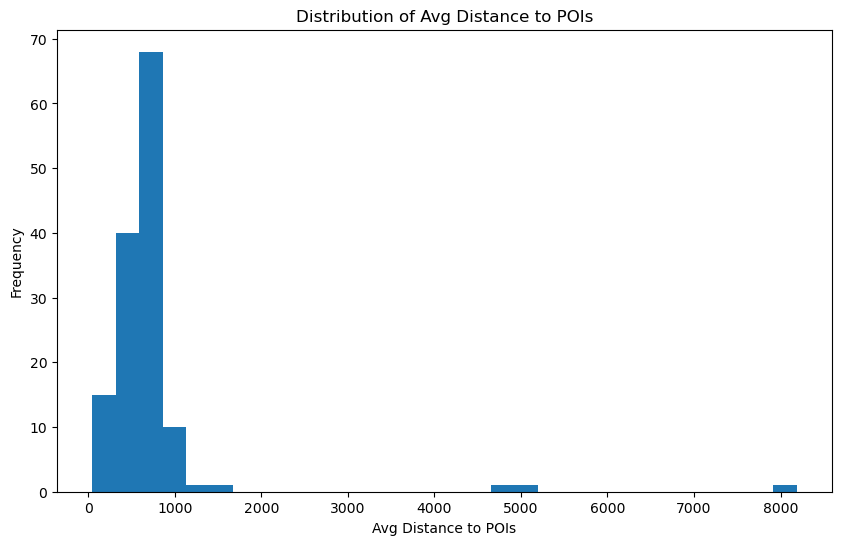

In [10]:
# plot the distribution of avg_distance for all stations
plt.figure(figsize=(10, 6))
plt.hist(Yelp_distance['Yelp_avg_distance'], bins=30)
plt.xlabel('Avg Distance to POIs')
plt.ylabel('Frequency')
plt.title('Distribution of Avg Distance to POIs')
plt.show()

# yelp has some major outliers lets try and remove them

In [11]:
# Identify and remove the major outliers for both Yelp and Foursquare using the IQR method
# Calculate the IQR for Yelp and Foursquare
FS_Q1 = FS_distance['FS_avg_distance'].quantile(0.25)
FS_Q3 = FS_distance['FS_avg_distance'].quantile(0.75)
FS_IQR = FS_Q3 - FS_Q1
FS_lower_bound = FS_Q1 - (1.5 * FS_IQR)
FS_upper_bound = FS_Q3 + (1.5 * FS_IQR)

Yelp_Q1 = Yelp_distance['Yelp_avg_distance'].quantile(0.25)
Yelp_Q3 = Yelp_distance['Yelp_avg_distance'].quantile(0.75)
Yelp_IQR = Yelp_Q3 - Yelp_Q1
Yelp_lower_bound = Yelp_Q1 - (1.5 * Yelp_IQR)
Yelp_upper_bound = Yelp_Q3 + (1.5 * Yelp_IQR)

# Remove the outliers
FS_distance = FS_distance[(FS_distance['FS_avg_distance'] > FS_lower_bound) & (FS_distance['FS_avg_distance'] < FS_upper_bound)]
Yelp_distance = Yelp_distance[(Yelp_distance['Yelp_avg_distance'] > Yelp_lower_bound) & (Yelp_distance['Yelp_avg_distance'] < Yelp_upper_bound)]

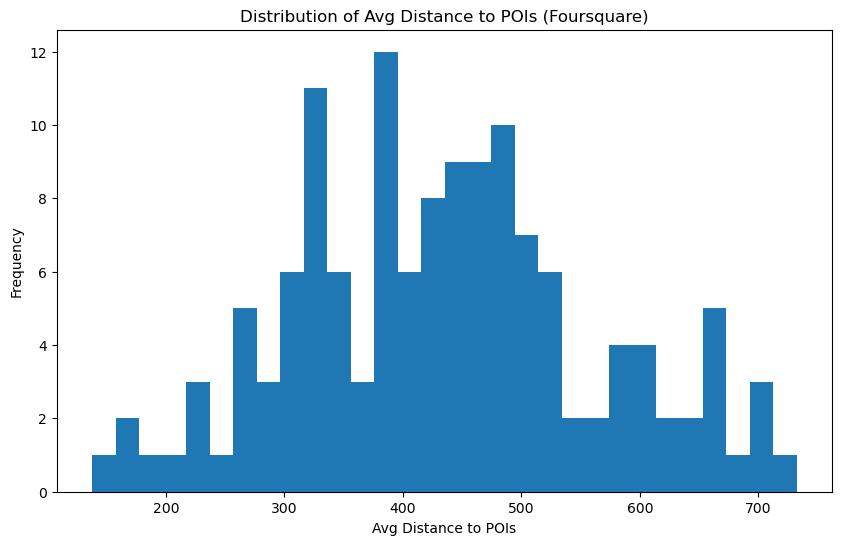

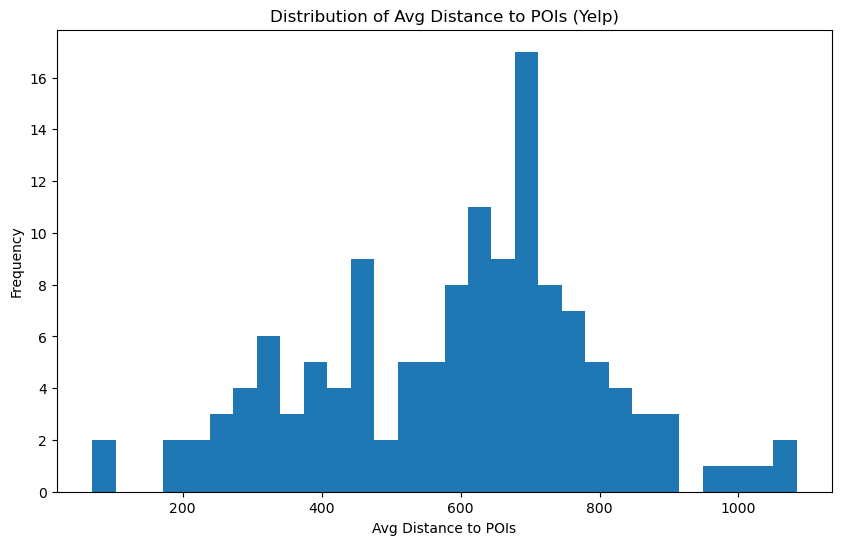

In [12]:
# using the same plot, plot the distribution of avg_distance for all stations after removing outliers
plt.figure(figsize=(10, 6))
plt.hist(FS_distance['FS_avg_distance'], bins=30)
plt.xlabel('Avg Distance to POIs')
plt.ylabel('Frequency')
plt.title('Distribution of Avg Distance to POIs (Foursquare)')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(Yelp_distance['Yelp_avg_distance'], bins=30)
plt.xlabel('Avg Distance to POIs')
plt.ylabel('Frequency')
plt.title('Distribution of Avg Distance to POIs (Yelp)')
plt.show()


C:\Users\eddie\AppData\Local\Temp\ipykernel_19964\974079013.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(FS_distance['FS_avg_distance'], shade=True)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


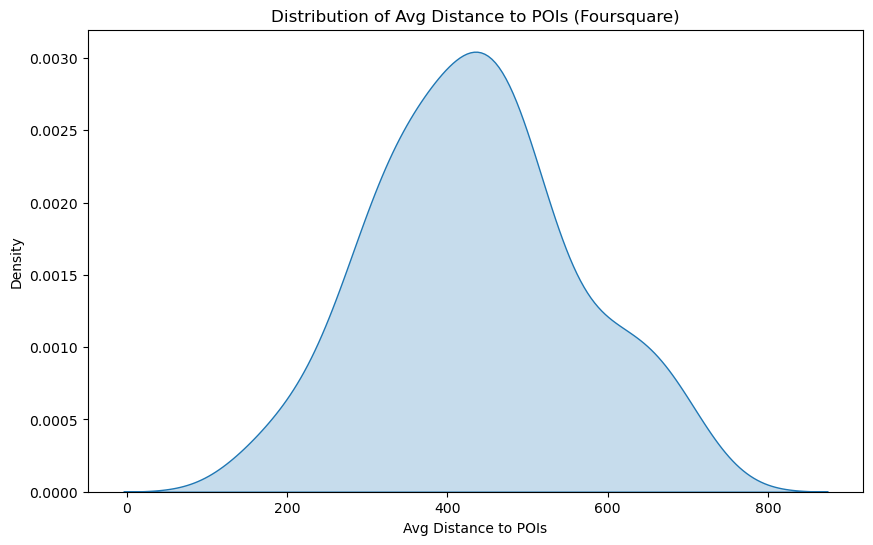

C:\Users\eddie\AppData\Local\Temp\ipykernel_19964\974079013.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Yelp_distance['Yelp_avg_distance'], shade=True)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


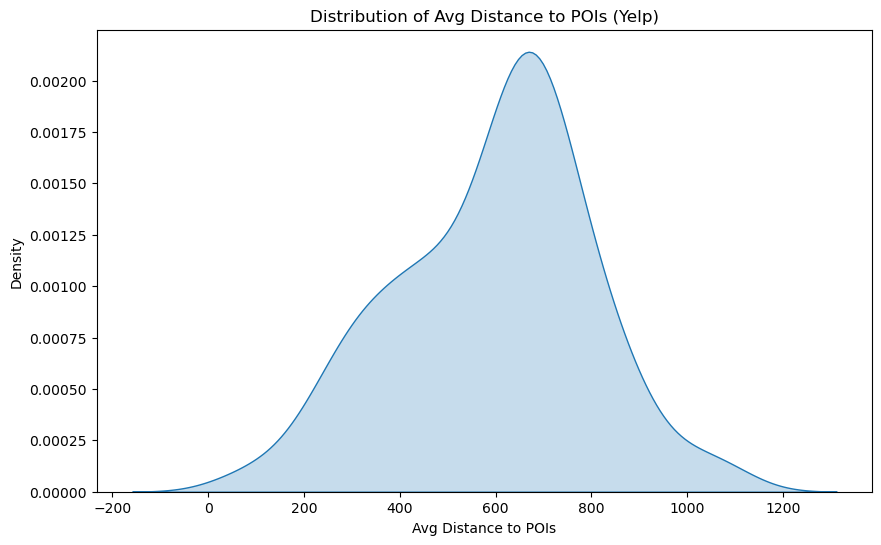

In [13]:
# can we identify the type of distribution for the avg_distance to POIs for each station?
# plot the distribution of avg_distance for all stations after removing outliers
plt.figure(figsize=(10, 6))
sns.kdeplot(FS_distance['FS_avg_distance'], shade=True)
plt.xlabel('Avg Distance to POIs')
plt.ylabel('Density')
plt.title('Distribution of Avg Distance to POIs (Foursquare)')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(Yelp_distance['Yelp_avg_distance'], shade=True)
plt.xlabel('Avg Distance to POIs')
plt.ylabel('Density')
plt.title('Distribution of Avg Distance to POIs (Yelp)')
plt.show()


# Foursquare seems to have a slight positive skew where as Yelp has a slight negative skew

In [14]:
# is there a corrleation between the bikestations distance to hamilton downtown and the avg_distance to POIs?
Hamilton_downtown = (43.25778, -79.861664)

# calculate the distance from each bike station to Hamilton downtown and save the results to a new dataframe
# maintain the station_id for each distance

# function to calculate the distance between two points
# using the Haversine formula (https://en.wikipedia.org/wiki/Haversine_formula)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the Earth in kilometers
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)

    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2)**2
    res = R * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))

    return np.round(res, 2) # return the distance in kilometers rounded to 2 decimal places




In [15]:
# for each bike station, calculate the distance to Hamilton downtown using the haversine function
# and save the results to a new dataframe
for index, row in bike_stations.iterrows():
    bike_stations.loc[index, 'distance_to_Hamilton_downtown'] = haversine(Hamilton_downtown[0], Hamilton_downtown[1], row['lat'], row['lon'])

bike_stations['distance_to_Hamilton_downtown']

0      5.25
1      4.94
2      2.61
3      1.51
4      2.86
       ... 
133    1.20
134    1.40
135    4.42
136    0.96
137    5.52
Name: distance_to_Hamilton_downtown, Length: 138, dtype: float64

In [16]:
# join the bike_stations df with the FS_distance and Yelp_distance dfs on the station_id column
# and save the results to a new dataframe
bike_stations_FS_Yelp = pd.merge(bike_stations, FS_distance, on='station_id', how='left')
bike_stations_FS_Yelp = pd.merge(bike_stations_FS_Yelp, Yelp_distance, on='station_id', how='left')

bike_stations_FS_Yelp

,station_id,name,lon,lat,address,num_bikes_available,num_bikes_disabled,last_reported,distance_to_Hamilton_downtown,FS_sum_distance,FS_POI_count,FS_avg_distance,Yelp_sum_distance,Yelp_POI_count,Yelp_avg_distance
0,hub_540,Sanders at Hollywood,-79.926481,43.259903,"26, Sanders Boulevard, University Gardens, Ham...",27,0,2024-03-09 15:06:26,5.25,4513.0,10.0,451.3,11432.203616,20.0,571.610181
1,hub_545,Emerson at Whitney,-79.922216,43.252142,"202, Emerson Street, University Gardens, Hamil...",16,0,2024-03-09 15:06:26,4.94,5883.0,10.0,588.3,14334.440094,20.0,716.722005
2,hub_557,Dundurn at Aberdeen,-79.892656,43.251458,"330-346 Dundurn Street South, Hamilton",13,0,2024-03-09 15:06:26,2.61,4996.0,10.0,499.6,13007.253359,12.0,1083.937780
3,hub_571,Oxford at York,-79.877794,43.264564,"40-48 Oxford Street, Hamilton",13,0,2024-03-09 15:06:26,1.51,5274.0,10.0,527.4,17638.011047,20.0,881.900552
4,hub_554,Macklin at King,-79.896498,43.262167,"768, King Street West, McMaster Innovation Par...",12,0,2024-03-09 15:06:26,2.86,4685.0,10.0,468.5,16839.432562,20.0,841.971628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,hub_605,Wentworth at King,-79.849104,43.251990,"16 Wentworth Street South, Hamilton",1,0,2024-03-09 15:06:26,1.20,4545.0,10.0,454.5,12422.151263,20.0,621.107563
134,hub_5838,King at Sanford,-79.846358,43.251884,"735, King Street East, Hamilton, Ontario",1,0,2024-03-09 15:06:26,1.40,4154.0,10.0,415.4,13571.871807,20.0,678.593590
135,hub_894,Forsyth at Sterling,-79.915806,43.262714,"88 Forsyth Avenue North, Hamilton",1,0,2024-03-09 15:06:26,4.42,3082.0,10.0,308.2,14952.267383,20.0,747.613369
136,hub_5846,Cannon at Steven,-79.849981,43.256461,"400-408 Cannon Street East, Hamilton",1,0,2024-03-09 15:06:26,0.96,4902.0,10.0,490.2,12848.011391,20.0,642.400570


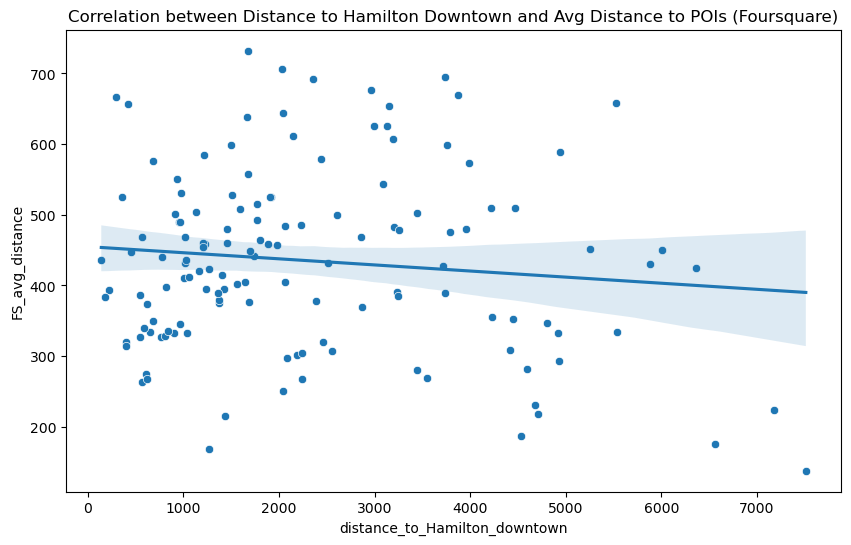

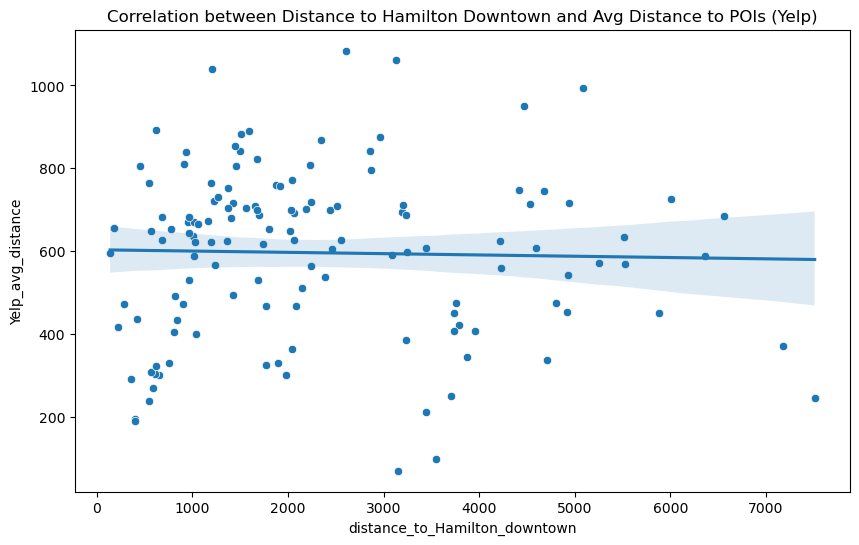

(-0.11231610735897224, -0.02583107003567583)

In [17]:
# plot the correlation between distance_to_Hamilton_downtown (KM) and FS_avg_distance (M) and Yelp_avg_distance (M)
#correct the distance_to_Hamilton_downtown to meters
bike_stations_FS_Yelp['distance_to_Hamilton_downtown'] = bike_stations_FS_Yelp['distance_to_Hamilton_downtown'] * 1000

plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_Hamilton_downtown', y='FS_avg_distance', data=bike_stations_FS_Yelp)
plt.xlabel('Distance to Hamilton Downtown (m)')
plt.ylabel('Avg Distance to POIs (Foursquare) (m)')
plt.title('Correlation between Distance to Hamilton Downtown and Avg Distance to POIs (Foursquare)')
# add a line of best fit
sns.regplot(x='distance_to_Hamilton_downtown', y='FS_avg_distance', data=bike_stations_FS_Yelp, scatter=False)

plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_Hamilton_downtown', y='Yelp_avg_distance', data=bike_stations_FS_Yelp)
plt.xlabel('Distance to Hamilton Downtown (m)')
plt.ylabel('Avg Distance to POIs (Yelp) (m)')
plt.title('Correlation between Distance to Hamilton Downtown and Avg Distance to POIs (Yelp)')
# add a line of best fit
sns.regplot(x='distance_to_Hamilton_downtown', y='Yelp_avg_distance', data=bike_stations_FS_Yelp, scatter=False)
plt.show()

# calculate the correlation between distance_to_Hamilton_downtown and FS_avg_distance and Yelp_avg_distance
# using the Pearson correlation coefficient
FS_corr = bike_stations_FS_Yelp['distance_to_Hamilton_downtown'].corr(bike_stations_FS_Yelp['FS_avg_distance'])
Yelp_corr = bike_stations_FS_Yelp['distance_to_Hamilton_downtown'].corr(bike_stations_FS_Yelp['Yelp_avg_distance'])

FS_corr, Yelp_corr

# My investigation show a very weak correlation between the distance to hamilton downtown and the avg distance to a POI from each bikestation

In [18]:
#save the bike_stations_FS_Yelp df to a new csv file
bike_stations_FS_Yelp.to_csv('..\\data\\bike_stations_FS_Yelp.csv', index=False)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [19]:
#create new Database files using the bike_stations_FS_Yelp df and the FS_nearby_POIs and Yelp_nearby_POIs dfs
import sqlite3

conn = sqlite3.connect('..\\data\\bike_stations_FS_Yelp.db')
bike_stations_FS_Yelp.to_sql('bike_stations_FS_Yelp', conn, if_exists='replace', index=False)

FS_nearby_POIs.to_sql('FS_nearby_POIs', conn, if_exists='replace', index=False)
Yelp_nearby_POIs.to_sql('Yelp_nearby_POIs', conn, if_exists='replace', index=False)

conn.close()



Look at the data before and after the join to validate your data.

In [20]:
# validate the data in the new database files
conn = sqlite3.connect('..\\data\\bike_stations_FS_Yelp.db')
query = "SELECT * FROM bike_stations_FS_Yelp"
bike_stations_FS_Yelp = pd.read_sql_query(query, conn)

query = "SELECT * FROM FS_nearby_POIs"
FS_nearby_POIs = pd.read_sql_query(query, conn)

query = "SELECT * FROM Yelp_nearby_POIs"
Yelp_nearby_POIs = pd.read_sql_query(query, conn)

conn.close()

bike_stations_FS_Yelp.head()

,station_id,name,lon,lat,address,num_bikes_available,num_bikes_disabled,last_reported,distance_to_Hamilton_downtown,FS_sum_distance,FS_POI_count,FS_avg_distance,Yelp_sum_distance,Yelp_POI_count,Yelp_avg_distance
0,hub_540,Sanders at Hollywood,-79.926481,43.259903,"26, Sanders Boulevard, University Gardens, Ham...",27,0,2024-03-09 15:06:26,5250.0,4513.0,10.0,451.3,11432.203616,20.0,571.610181
1,hub_545,Emerson at Whitney,-79.922216,43.252142,"202, Emerson Street, University Gardens, Hamil...",16,0,2024-03-09 15:06:26,4940.0,5883.0,10.0,588.3,14334.440094,20.0,716.722005
2,hub_557,Dundurn at Aberdeen,-79.892656,43.251458,"330-346 Dundurn Street South, Hamilton",13,0,2024-03-09 15:06:26,2610.0,4996.0,10.0,499.6,13007.253359,12.0,1083.937780
3,hub_571,Oxford at York,-79.877794,43.264564,"40-48 Oxford Street, Hamilton",13,0,2024-03-09 15:06:26,1510.0,5274.0,10.0,527.4,17638.011047,20.0,881.900552
4,hub_554,Macklin at King,-79.896498,43.262167,"768, King Street West, McMaster Innovation Par...",12,0,2024-03-09 15:06:26,2860.0,4685.0,10.0,468.5,16839.432562,20.0,841.971628


In [21]:
FS_nearby_POIs.head()

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,...,location.address_extended,related_places.children,geocodes.drop_off.latitude,geocodes.drop_off.longitude,geocodes.front_door.latitude,geocodes.front_door.longitude,station_id,related_places.parent.fsq_id,related_places.parent.categories,related_places.parent.name
0,4c405e7a520fa593a3e6c7ac,Diner,[],LikelyOpen,348,/v3/places/4c405e7a520fa593a3e6c7ac,Maple Leaf Pancake House,America/Toronto,43.257771,-79.923534,...,None,None,NaN,NaN,NaN,NaN,hub_540,None,None,None
1,4b6b5d23f964a520a7032ce3,Pub,[],LikelyOpen,547,/v3/places/4b6b5d23f964a520a7032ce3,Phoenix Bar & Grill,America/Toronto,43.262878,-79.921158,...,None,None,NaN,NaN,NaN,NaN,hub_540,None,None,None
2,4ba9734cf964a520f3273ae3,Chinese Restaurant,[],VeryLikelyOpen,315,/v3/places/4ba9734cf964a520f3273ae3,Tally Ho Restaurants,America/Toronto,43.257728,-79.924083,...,None,None,NaN,NaN,NaN,NaN,hub_540,None,None,None
3,4bb832a87421a5937ca4c140,Pizzeria,[{'id': 'd5737460-d890-0132-61d3-7a163eb2a6fc'...,VeryLikelyOpen,308,/v3/places/4bb832a87421a5937ca4c140,Boston Pizza,America/Toronto,43.257231,-79.927615,...,Cottrill St,None,NaN,NaN,NaN,NaN,hub_540,None,None,None
4,59035559061b51746eba7df9,Brewery,[],VeryLikelyOpen,546,/v3/places/59035559061b51746eba7df9,Grain & Grit Beer Co,America/Toronto,43.256697,-79.931604,...,None,None,NaN,NaN,NaN,NaN,hub_540,None,None,None


In [22]:
Yelp_nearby_POIs.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address,station_id
0,KrvHV0kJlf8XzVChZHSzJA,mr-gao-hamilton,Mr Gao,https://s3-media3.fl.yelpcdn.com/bphoto/COI8HS...,0,https://www.yelp.com/biz/mr-gao-hamilton?adjus...,35,"[{'alias': 'chinese', 'title': 'Chinese'}]",3.3,[],...,-79.928170,1561 Main Street W,None,None,Hamilton,L8S 1E6,CA,ON,"['1561 Main Street W', 'Hamilton, ON L8S 1E6',...",hub_540
1,3xgdFtqUHcRosOnu3-B6fg,maccheroni-cucina-alfresco-hamilton,Maccheroni Cucina Alfresco,https://s3-media2.fl.yelpcdn.com/bphoto/BLpSFv...,0,https://www.yelp.com/biz/maccheroni-cucina-alf...,11,"[{'alias': 'italian', 'title': 'Italian'}]",3.8,[],...,-79.926349,1560 Main Street W,None,None,Hamilton,L8S 1E7,CA,ON,"['1560 Main Street W', 'Hamilton, ON L8S 1E7',...",hub_540
2,6q9ODD89p-EntewcOD8J-Q,boston-pizza-hamilton,Boston Pizza,https://s3-media4.fl.yelpcdn.com/bphoto/2AJgHo...,0,https://www.yelp.com/biz/boston-pizza-hamilton...,22,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.4,[],...,-79.927749,1563 Main Street W,None,None,Hamilton,L8S 1E6,CA,ON,"['1563 Main Street W', 'Hamilton, ON L8S 1E6',...",hub_540
3,o-WonoWNOF1sxHBJMtHvnQ,dough-box-hamilton,Dough Box,https://s3-media2.fl.yelpcdn.com/bphoto/ad0Nxb...,0,https://www.yelp.com/biz/dough-box-hamilton?ad...,22,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.5,[],...,-79.923949,1457 Main Street W,None,None,Hamilton,L8S 1C9,CA,ON,"['1457 Main Street W', 'Hamilton, ON L8S 1C9',...",hub_540
4,c544C_J-M3A30TPeOYXPjg,the-phoenix-bar-and-grill-hamilton,The Phoenix Bar & Grill,https://s3-media2.fl.yelpcdn.com/bphoto/DqI7k4...,0,https://www.yelp.com/biz/the-phoenix-bar-and-g...,19,"[{'alias': 'pubs', 'title': 'Pubs'}, {'alias':...",3.8,[],...,-79.921138,1280 Main Street W,None,None,Hamilton,L8S 4K1,CA,ON,"['1280 Main Street W', 'Hamilton, ON L8S 4K1',...",hub_540


In [23]:
#query the new database to get the 5 closest bike stations to Hamilton downtown and the avg distance to POIs for each
conn = sqlite3.connect('..\\data\\bike_stations_FS_Yelp.db')
query = '''
    SELECT * 
    FROM bike_stations_FS_Yelp 
    ORDER BY distance_to_Hamilton_downtown 
    LIMIT 5
'''
bike_stations_FS_Yelp_closest = pd.read_sql(query, conn)
conn.close()
#output the results
bike_stations_FS_Yelp_closest

,station_id,name,lon,lat,address,num_bikes_available,num_bikes_disabled,last_reported,distance_to_Hamilton_downtown,FS_sum_distance,FS_POI_count,FS_avg_distance,Yelp_sum_distance,Yelp_POI_count,Yelp_avg_distance
0,hub_5790,Beasley Park,-79.861065,43.258919,"55 Elgin Street, Hamilton",5,0,2024-03-09 15:06:26,140.0,4361.0,10.0,436.1,11899.940023,20.0,594.997001
1,hub_590,Ferguson at Cannon,-79.859823,43.258751,"156, Cannon Street East, Beasley, Hamilton, On...",5,0,2024-03-09 15:06:26,180.0,3843.0,10.0,384.3,13089.332958,20.0,654.466648
2,hub_527,Seedworks,-79.863613,43.259111,"126 Catharine Street North, Hamilton",6,0,2024-03-09 15:06:26,220.0,3937.0,10.0,393.7,8309.542618,20.0,415.477131
3,hub_591,Ferguson at King William,-79.861443,43.255179,"4-12 Ferguson Avenue North, Hamilton",6,0,2024-03-09 15:06:26,290.0,6672.0,10.0,667.2,9434.411916,20.0,471.720596
4,hub_1397,King at Mary,-79.864378,43.255196,"151-163 Hamilton Regional Road 8, Hamilton",7,0,2024-03-09 15:06:26,360.0,5256.0,10.0,525.6,5806.372057,20.0,290.318603
